# Bivariate normal with t distribution as proposal 


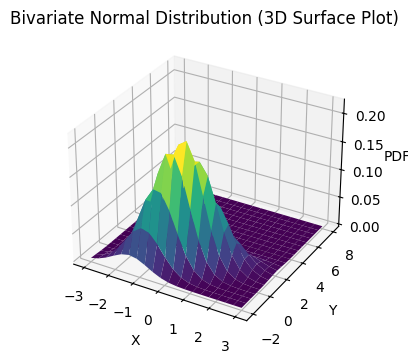

In [56]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

# 
# since σ1 and σ2 is 1 the covariance is equal to ρ 
# hence covariance matrix is given as 

ρ = 0.7
μ = [0,0]
cov= [[1,ρ],[ρ,1]]

bivariate_normal = st.multivariate_normal(μ,cov)

a = np.linspace(-3,3,20)
b = np.linspace(-2,8,20)

X,Y = np.meshgrid(a,b)

pos = np.dstack((X,Y))

Z = bivariate_normal.pdf(pos)

fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z, cmap = 'viridis')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('PDF')
ax.set_title('Bivariate Normal Distribution (3D Surface Plot)')

plt.show()


In [10]:
bivariate_normal.pdf([-1,3])

0.02578228798875853

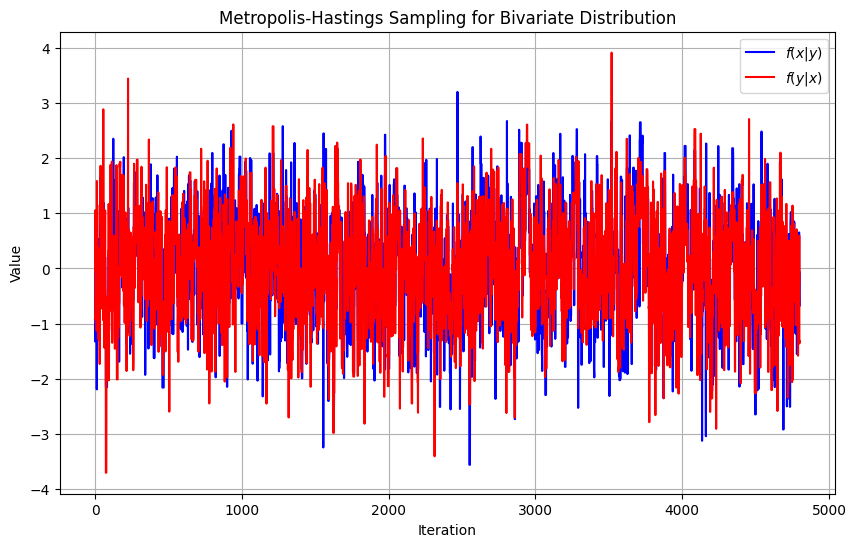

In [67]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters
M = 5000 # Number of samples
df_x = 3  # Degrees of freedom for the t-distribution (x)
df_y = 9  # Degrees of freedom for the t-distribution (y)

# Initialize x and y
x = [10]  # Initial value for x
y = [10]  # Initial value for y

# Define the bivariate normal distribution
mean = [0, 0]  # Mean of the bivariate normal
cov = [[1, 0.7], [0.7, 1]]  # Covariance matrix
bivariate_normal = multivariate_normal(mean, cov)

# Metropolis-Hastings sampling
for i in range(1, M):
    # Sample x given y (f(x|y))
    z = np.random.standard_t(df=df_x, size=1)[0]  # Propose new x (extract scalar)
    u = np.random.uniform(0, 1)  # Uniform random number for acceptance

    # Compute acceptance ratio for x
    nume = bivariate_normal.pdf([z, y[i-1]]) * st.t.pdf(x[i-1], df=df_x)
    demo = bivariate_normal.pdf([x[i-1], y[i-1]]) * st.t.pdf(z, df=df_x)
    alpha = min(1, nume / demo)  # Acceptance probability

    # Accept or reject the proposal for x
    if u <= alpha:
        x.append(z)
    else:
        x.append(x[i-1])

    # Sample y given x (f(y|x))
    z1 = np.random.standard_t(df=df_y, size=1)[0]  # Propose new y (extract scalar)
    u1 = np.random.uniform(0, 1)  # Uniform random number for acceptance

    # Compute acceptance ratio for y
    nume1 = bivariate_normal.pdf([x[i], z1]) * st.t.pdf(y[i-1], df=df_y)
    demo1 = bivariate_normal.pdf([x[i], y[i-1]]) * st.t.pdf(z1, df=df_y)
    alpha1 = min(1, nume1 / demo1)  # Acceptance probability

    # Accept or reject the proposal for y
    if u1 <= alpha1:
        y.append(z1)
    else:
        y.append(y[i-1])  # Append the current value if rejected

burn_in = 200
# Discard burn-in samples
x = x[burn_in:]
y = y[burn_in:]



# Plot the results
M_list = list(range(len(x)))
plt.figure(figsize=(10, 6))
plt.plot(M_list, x, color="blue", label="$f(x|y)$")
plt.plot(M_list, y, color="red", label="$f(y|x)$")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.title("Metropolis-Hastings Sampling for Bivariate Distribution")
plt.legend()
plt.grid()





plt.show()

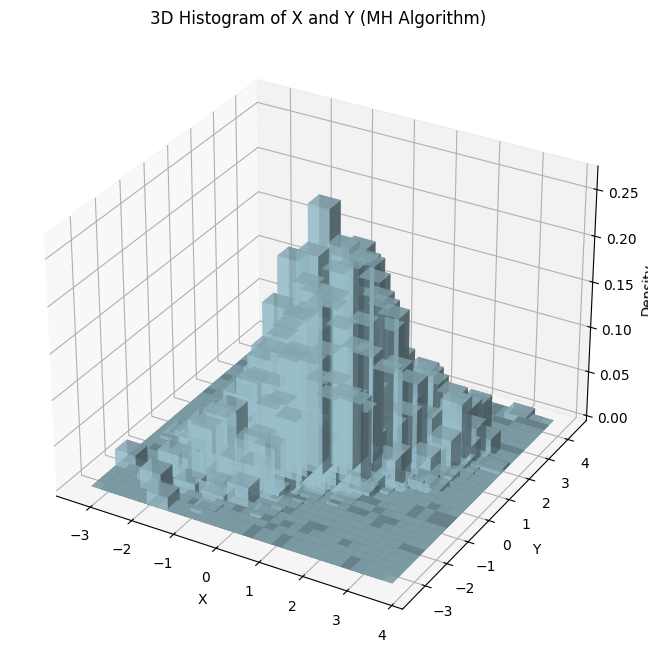

In [81]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt


# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=30, density=True)

# Create grid for 3D plot
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

# Define the size of the bars
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.flatten()

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D histogram
ax.bar3d(xpos, ypos, zpos, dx, dy, dz,alpha= 0.7,color = 'lightblue')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Density')
ax.set_title('3D Histogram of X and Y (MH Algorithm)')

plt.show()

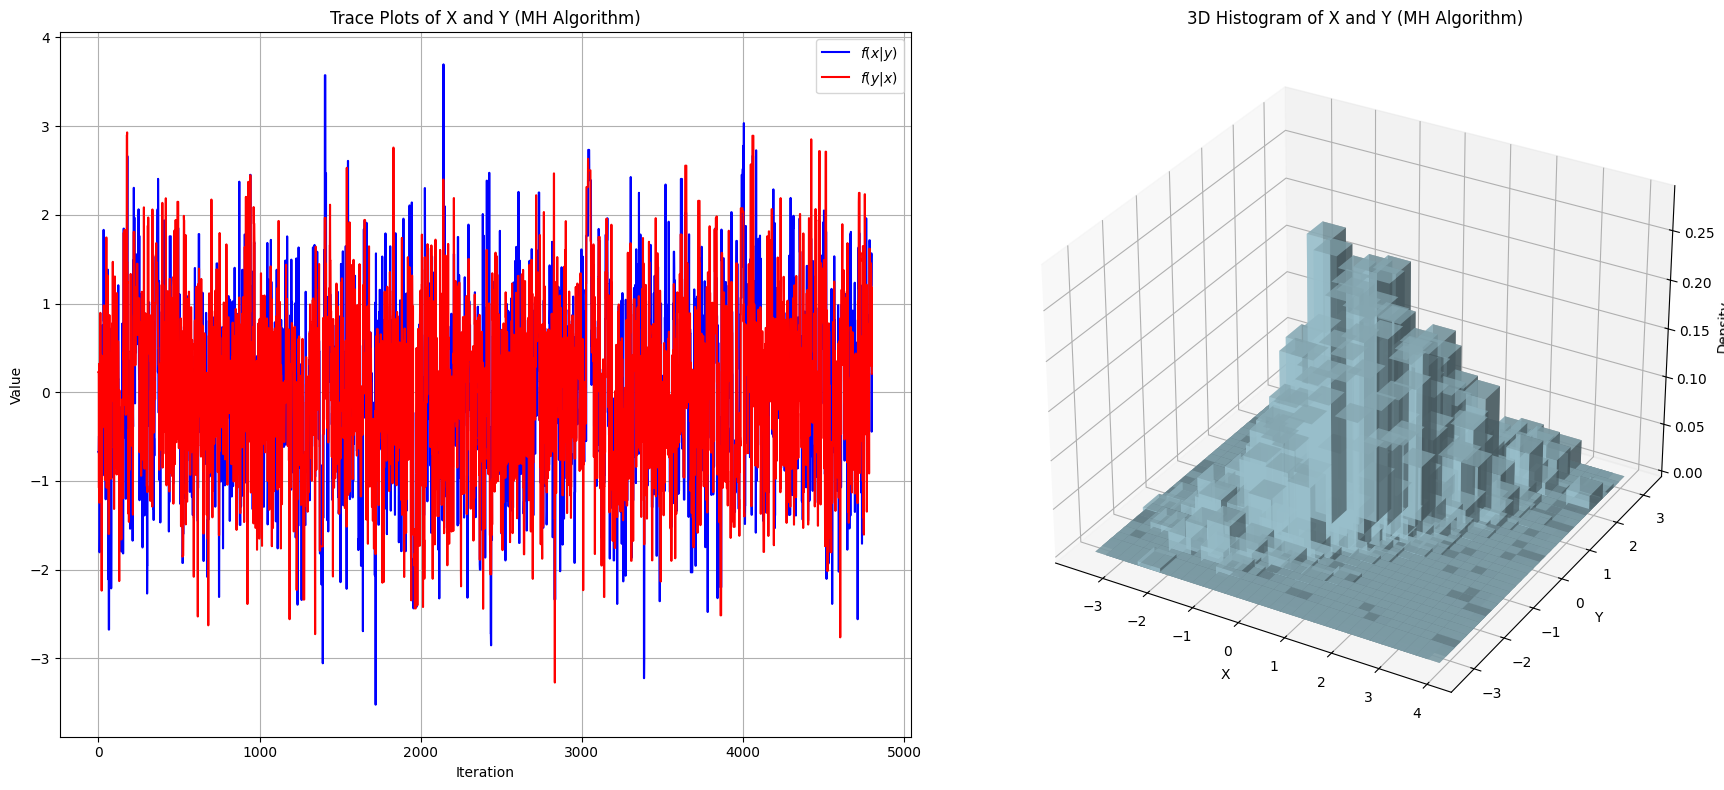

In [64]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# Parameters
M = 5000  # Number of samples
burn_in = 200  # Number of burn-in samples to discard
df_x = 3  # Degrees of freedom for the t-distribution (x)
df_y = 9  # Degrees of freedom for the t-distribution (y)

# Initialize x and y
x = [10]  # Initial value for x
y = [10]  # Initial value for y

# Define the bivariate normal distribution
mean = [0, 0]  # Mean of the bivariate normal
cov = [[1, 0.7], [0.7, 1]]  # Covariance matrix
bivariate_normal = multivariate_normal(mean, cov)

# Metropolis-Hastings sampling
for i in range(1, M):
    # Sample x given y (f(x|y))
    z = np.random.standard_t(df=df_x, size=1)[0]  # Propose new x (extract scalar)
    u = np.random.uniform(0, 1)  # Uniform random number for acceptance

    # Compute acceptance ratio for x
    nume = bivariate_normal.pdf([z, y[i-1]]) * st.t.pdf(x[i-1], df=df_x)
    demo = bivariate_normal.pdf([x[i-1], y[i-1]]) * st.t.pdf(z, df=df_x)
    alpha = min(1, nume / demo)  # Acceptance probability

    # Accept or reject the proposal for x
    if u <= alpha:
        x.append(z)
    else:
        x.append(x[i-1])

    # Sample y given x (f(y|x))
    z1 = np.random.standard_t(df=df_y, size=1)[0]  # Propose new y (extract scalar)
    u1 = np.random.uniform(0, 1)  # Uniform random number for acceptance

    # Compute acceptance ratio for y
    nume1 = bivariate_normal.pdf([x[i], z1]) * st.t.pdf(y[i-1], df=df_y)
    demo1 = bivariate_normal.pdf([x[i], y[i-1]]) * st.t.pdf(z1, df=df_y)
    alpha1 = min(1, nume1 / demo1)  # Acceptance probability

    # Accept or reject the proposal for y
    if u1 <= alpha1:
        y.append(z1)
    else:
        y.append(y[i-1])  # Append the current value if rejected

# Discard burn-in samples
x = x[burn_in:]
y = y[burn_in:]

# Create a figure with subplots
fig = plt.figure(figsize=(18, 8))

# Subplot 1: Trace plots of x and y
ax1 = fig.add_subplot(121)
M_list = list(range(len(x)))
ax1.plot(M_list, x, color="blue", label="$f(x|y)$")
ax1.plot(M_list, y, color="red", label="$f(y|x)$")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Value")
ax1.set_title("Trace Plots of X and Y (MH Algorithm)")
ax1.legend()
ax1.grid()

# Subplot 2: 3D histogram of x and y
ax2 = fig.add_subplot(122, projection='3d')

# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=30, density=True)

# Create grid for 3D plot
xpos, ypos = np.meshgrid(xedges[:-1] +0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

# Define the size of the bars
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.flatten()

# Plot the 3D histogram
ax2.bar3d(xpos, ypos, zpos, dx, dy, dz, alpha=0.7, color='lightblue')

# Add labels and title
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Density')
ax2.set_title('3D Histogram of X and Y (MH Algorithm)')

plt.tight_layout()
plt.show()

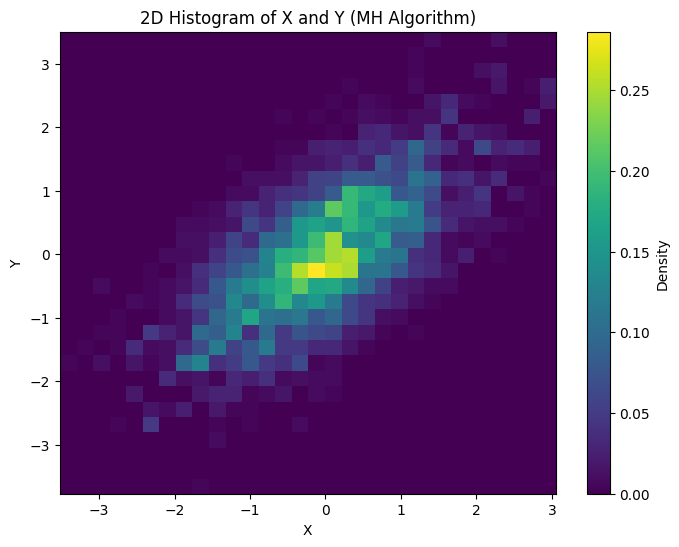

In [52]:
# Create a 2D histogram (heatmap)
plt.figure(figsize=(8, 6))
hist, xedges, yedges = np.histogram2d(x, y, bins=30, density=True)
plt.imshow(hist.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
           origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Histogram of X and Y (MH Algorithm)')
plt.show()


# Gibbs sampler: mixture of three normal distributions


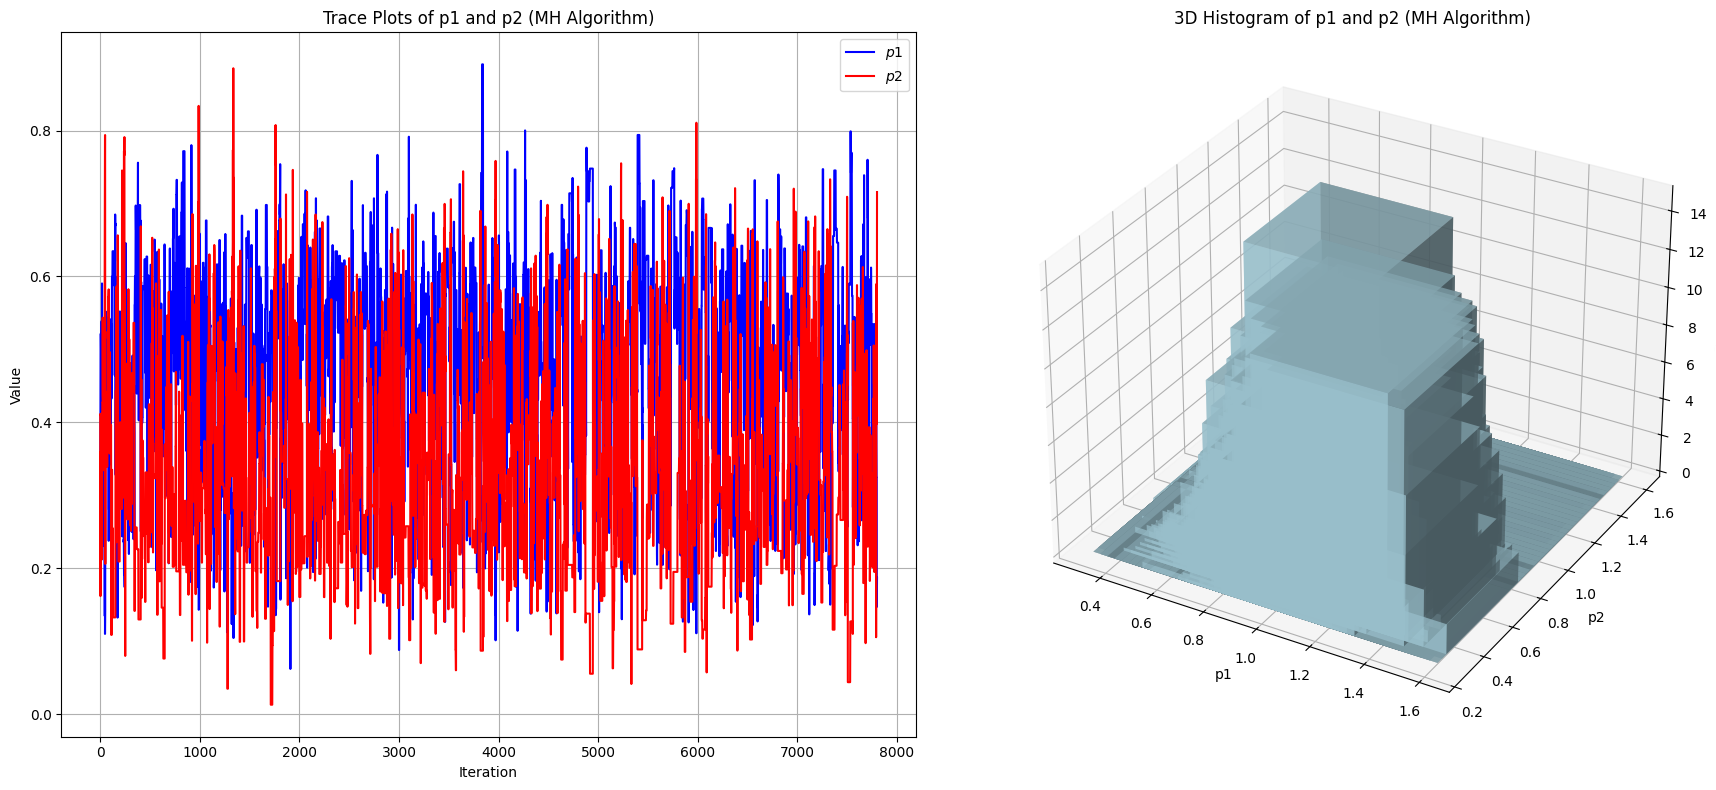

In [116]:
import numpy as np
import scipy.stats as st
from scipy.special import gamma
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
α1 = 4
α2 = 3
α3 = 2
a1 = 2
b1 = 4
a2 = 3
b2 = 2
n = 400  # Number of data points
burn_in = 200  # Burn-in period

μ_vals = [0, 2, 4]  # Means of the three normal distributions
σ_vals = [0.1, 0.3, 0.6]  # Standard deviations of the three normal distributions
p_vals = [1/3, 1/3, 1/3]  # Mixing proportions (weights) of the three distributions

# Function to generate one realization from the mixture distribution
def generate_mixture_sample(μ_vals, σ_vals, p_vals):
    # Step 1: Randomly select one of the three distributions based on the mixing proportions
    selected_distribution = np.random.choice(3, p=p_vals)
    
    # Step 2: Generate a value from the selected distribution
    sample = np.random.normal(loc=μ_vals[selected_distribution], scale=σ_vals[selected_distribution])
    
    return sample

# Generate data from the mixture distribution
np.random.seed(42)  # For reproducibility
z = np.array([generate_mixture_sample(μ_vals, σ_vals, p_vals) for _ in range(n)])

# Define the prior function
def prior(p1, p2):
    k = gamma(α1 + α2 + α3) / (gamma(α1) * gamma(α2) * gamma(α3))
    if p1 > 0 and p2 > 0 and p1 + p2 < 1:
        return k * p1**(α1-1) * p2**(α2-1) * (1 - p1 - p2)**(α3-1)
    else:
        return 0  # Return 0 for invalid values of p1 and p2

# Define the likelihood function
def likelihood_for_prior(p1, p2):
    likelihood = np.prod(
        p1 * st.norm.pdf(z, loc=μ_vals[0], scale=σ_vals[0]) +
        p2 * st.norm.pdf(z, loc=μ_vals[1], scale=σ_vals[1]) +
        (1 - p1 - p2) * st.norm.pdf(z, loc=μ_vals[2], scale=σ_vals[2])
    )
    return likelihood

# Initialize p1 and p2
p1_vals = [0.3]
p2_vals = [0.3]

# Number of samples
M = 8000

# Metropolis-Hastings sampling
for i in range(1, M):
    # Propose new values for p1 and p2
    z = np.random.beta(a=a1, b=b1)  # Propose new p1
    u = np.random.uniform(0, 1)  # Uniform random number for acceptance

    # Compute acceptance ratio for p1
    nume = likelihood_for_prior(z, p2_vals[i-1]) * prior(z, p2_vals[i-1]) * st.beta.pdf(p1_vals[i-1], a1, b1)
    demo = likelihood_for_prior(p1_vals[i-1], p2_vals[i-1]) * prior(p1_vals[i-1], p2_vals[i-1]) * st.beta.pdf(z, a1, b1)
    alpha = min(1, nume / demo)  # Acceptance probability

    # Accept or reject the proposal for p1
    if u <= alpha:
        p1_vals.append(z)
    else:
        p1_vals.append(p1_vals[i-1])

    # Propose new values for p2
    z1 = np.random.beta(a=a2, b=b2)  # Propose new p2
    u1 = np.random.uniform(0, 1)  # Uniform random number for acceptance

    # Compute acceptance ratio for p2
    nume1 = likelihood_for_prior(p1_vals[i], z1) * prior(p1_vals[i], z1) * st.beta.pdf(p2_vals[i-1], a2, b2)
    demo1 = likelihood_for_prior(p1_vals[i], p2_vals[i-1]) * prior(p1_vals[i], p2_vals[i-1]) * st.beta.pdf(z1, a2, b2)
    alpha1 = min(1, nume1 / demo1)  # Acceptance probability

    # Accept or reject the proposal for p2
    if u1 <= alpha1:
        p2_vals.append(z1)
    else:
        p2_vals.append(p2_vals[i-1])

# Discard burn-in samples
p1_vals = p1_vals[burn_in:]
p2_vals = p2_vals[burn_in:]

# Create a figure with subplots
fig = plt.figure(figsize=(18, 8))

# Subplot 1: Trace plots of p1 and p2
ax1 = fig.add_subplot(121)
M_list = list(range(len(p1_vals)))
ax1.plot(M_list, p1_vals, color="blue", label="$p1$")
ax1.plot(M_list, p2_vals, color="red", label="$p2$")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Value")
ax1.set_title("Trace Plots of p1 and p2 (MH Algorithm)")
ax1.legend()
ax1.grid()

# Subplot 2: 3D histogram of p1 and p2
ax2 = fig.add_subplot(122, projection='3d')

# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(p1_vals, p2_vals, bins=30, density=True)

# Create grid for 3D plot
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

# Define the size of the bars
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.flatten()

# Plot the 3D histogram
ax2.bar3d(xpos, ypos, zpos, dx, dy, dz, alpha=0.7, color='lightblue')

# Add labels and title
ax2.set_xlabel('p1')
ax2.set_ylabel('p2')
ax2.set_zlabel('Density')
ax2.set_title('3D Histogram of p1 and p2 (MH Algorithm)')

plt.tight_layout()
plt.show()

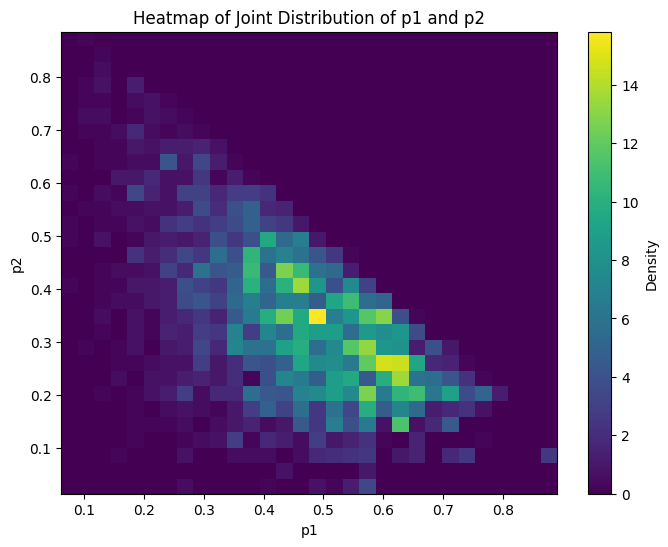

In [115]:
# Create a 2D histogram for the heatmap
hist, xedges, yedges = np.histogram2d(p1_vals, p2_vals, bins=30, density=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
           origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Density')
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Heatmap of Joint Distribution of p1 and p2')
plt.show()